In [47]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler,scale
from sklearn import linear_model,cross_validation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold,train_test_split,cross_validate
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
#Load data
trainG1=pd.read_csv('Train_G1.csv',sep=';')
trainG2=pd.read_csv('Train_G2.csv',sep=';')


Skewness: 1.255497
Kurtosis: 1.395748


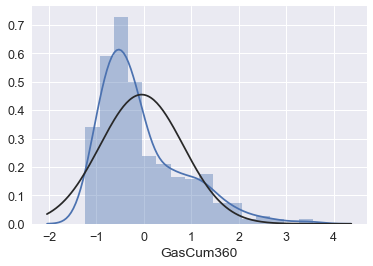

In [49]:
sns.distplot(trainG1.GasCum360,fit=norm)
print("Skewness: %f" % trainG1.GasCum360.skew())
print("Kurtosis: %f" % trainG1.GasCum360.kurt())

Skewness: 1.255497
Kurtosis: 1.395748


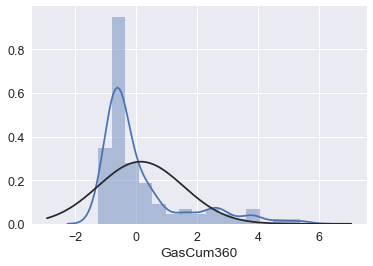

In [50]:
sns.distplot(trainG2.GasCum360,fit=norm)
print("Skewness: %f" % trainG1.GasCum360.skew())
print("Kurtosis: %f" % trainG1.GasCum360.kurt())

We will change the training data set for the group 2 of variables

- include the part C in the training set containing only 26 variables

In [51]:
trainG2=pd.concat([trainG1[trainG2.columns], trainG2])

In [52]:
#Checking missing values :
missingG1=trainG1.isnull().sum().sort_values(ascending=False)
missingG1[missingG1.values>0]

Frac_Gradient (PSI/ft)        8
Max_Rate_Slurry (bpm)         2
Min_Rate_Slurry (bpm)         1
Proppant_in_Formation (kg)    1
dtype: int64

In [53]:
for col in missingG1[missingG1.values>0].index:
    trainG1.loc[trainG1[col].isnull(),col]=np.mean(trainG1[col])

In [54]:
#just checking that there's no missing data missing...
trainG1.isnull().sum().max(),trainG2.isnull().sum().max()

(0, 0)

# Modèle de Gas

Checking correlations of our target variables (will help us to interpret results of our model)

**Group1_OIL**

In [55]:
trainG1.drop('OilCum360',axis=1,inplace=True)

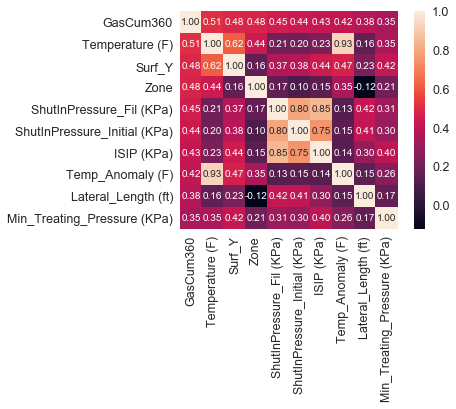

In [56]:
corG1=trainG1.corr()
k = 10 #number of variables for heatmap
cols = corG1.nlargest(k, 'GasCum360')['GasCum360'].index
cm = np.corrcoef(trainG1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Now we are ready to apply linear models starting with OLS linear regression model**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(trainG1.iloc[:,1:].drop('GasCum360',axis=1), trainG1.GasCum360, test_size=0.3, random_state=0)

In [58]:
lmG1=linear_model.LinearRegression()

In [59]:
#API is an identifier of the well so we'll not include it into features
lmG1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
pd.DataFrame(index=np.array(X_train.columns),data=lmG1.coef_,columns=['Coefficient']).sort_values('Coefficient')

,Coefficient
Surf_X,-1.185446
Surf_Y,-1.010367
Vcarb_PPLS,-0.774336
Depth_TVD_PPLS (ft),-0.706272
TOC_PPLS (%),-0.529919
Proppant_in_Formation (kg),-0.275524
Vclay_PPLS,-0.248769
RHOB_PPLS (g/cc),-0.209361
Vsand_PPLS,-0.184835
Proppant_per_ft (kg/ft),-0.160994


In [61]:
y_pred = lmG1.predict(X_test)

In [62]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 0.30
Variance score: 0.48


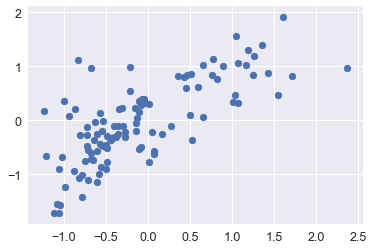

In [63]:
plt.scatter(y_test,y_pred)

*GROUP2*

In [64]:
X_train, X_test, y_train, y_test = train_test_split(trainG2.iloc[:,1:].drop('GasCum360',axis=1), trainG2.GasCum360, test_size=0.3, random_state=0)

In [65]:
lmG2=linear_model.LinearRegression()

In [66]:
#API is an identifier of the well so we'll not include it into features
lmG2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
pd.DataFrame(index=np.array(X_train.columns),data=lmG2.coef_,columns=['Coefficient']).sort_values('Coefficient')

,Coefficient
TOC_PPLS (%),-0.481074
Vclay_PPLS,-0.372221
RHOB_PPLS (g/cc),-0.348779
Temp_Anomaly (F),-0.143430
YM_PPLS (PSI),-0.143228
Vsand_PPLS,-0.136257
Vcarb_PPLS,-0.114206
Erosion_PPLS (ft),-0.108428
PR_PPLS,-0.096410
DT_PPLS (us/ft),-0.066937


In [68]:
y_pred = lmG2.predict(X_test)

In [69]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 0.36
Variance score: 0.52


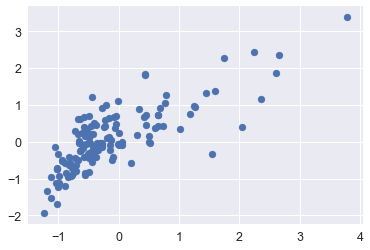

In [70]:
plt.scatter(y_test,y_pred)

### Feature selection (principal components) for linear regression

*GROUP1*

In [71]:
#let's perform pca on our data and pcr so we can see if there is an improvement:
pca = PCA()
trainG1_reduced = pca.fit_transform(scale(trainG1.iloc[:,1:].drop('GasCum360',axis=1)))
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  18.92,   32.8 ,   44.08,   50.56,   56.45,   61.1 ,   65.35,
         68.98,   72.25,   75.25,   77.99,   80.41,   82.59,   84.65,
         86.39,   87.98,   89.43,   90.78,   92.03,   93.14,   94.14,
         94.97,   95.68,   96.35,   96.9 ,   97.45,   97.93,   98.33,
         98.71,   98.96,   99.18,   99.36,   99.52,   99.66,   99.78,
         99.85,   99.9 ,   99.94,   99.97,   99.99,  100.  ,  100.01,
        100.01])

In [72]:
n = len(trainG1_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=2)
lmG1_pcr = linear_model.LinearRegression()
mse = []

In [73]:
score = -1*cross_validation.cross_val_score(lmG1_pcr, np.ones((n,1)),  trainG1.GasCum360.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score) 

In [74]:
mse

[0.77298209157949016]

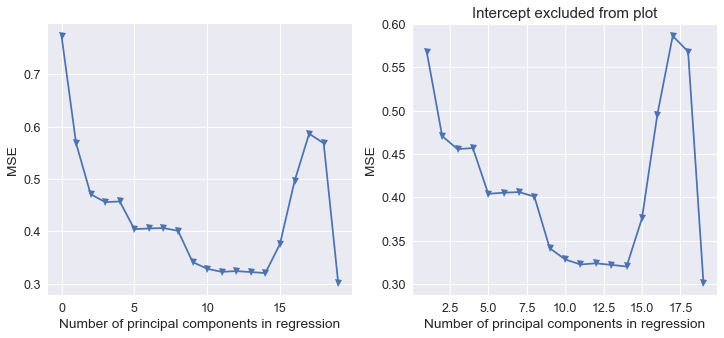

In [75]:
for i in np.arange(1,20):
    score = -1*cross_validation.cross_val_score(lmG1_pcr, trainG1_reduced[:,:i], trainG1.GasCum360.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], mse[1:20], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    #ax.title('OilCum360')

Once we performed a cv on our pcr : we see that a number of 14 pcs gives lowest mse Let's see what regression gives with splitting train and test

In [76]:
pca2 = PCA()
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(trainG1.iloc[:,1:].drop('GasCum360',axis=1), trainG1.GasCum360, test_size=0.3, random_state=0)
# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))

In [77]:
n = len(X_reduced_train)
# 10-fold CV, with shuffle
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
mse = []

In [78]:
# Calculate MSE with only the intercept (no principal components in regression)
lmG1=linear_model.LinearRegression()
score = -1*cross_validation.cross_val_score(lmG1, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
mse.append(score)

Text(0.5,1,'OilCum360')

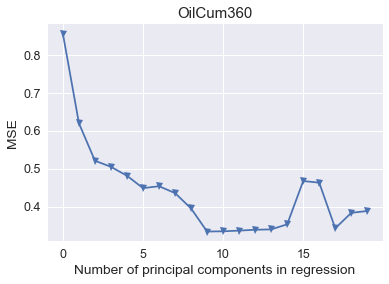

In [79]:
# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_validation.cross_val_score(lmG1, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)
    
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('OilCum360')

In [82]:
X_reduced_test = pca2.transform(scale(X_test))[:,:15]
# Train regression model on training data
regr = linear_model.LinearRegression()
regr.fit(X_reduced_train[:,:15], y_train)
# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

0.258425640560417

*GROUP2*

In [83]:
pca = PCA()
trainG2_reduced = pca.fit_transform(scale(trainG2.iloc[:,1:].drop('GasCum360',axis=1)))
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  28.35,   46.73,   58.77,   67.99,   73.25,   77.71,   81.74,
         85.13,   88.32,   90.61,   92.61,   94.22,   95.65,   96.69,
         97.59,   98.43,   99.03,   99.34,   99.63,   99.77,   99.9 ,
         99.95,   99.99,  100.01])

In [84]:
n = len(trainG2_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=2)
lmG2_pcr = linear_model.LinearRegression()
mse = []

In [85]:
score = -1*cross_validation.cross_val_score(lmG2_pcr, np.ones((n,1)),  trainG2.GasCum360.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score) 

In [86]:
mse

[1.0366638982702563]

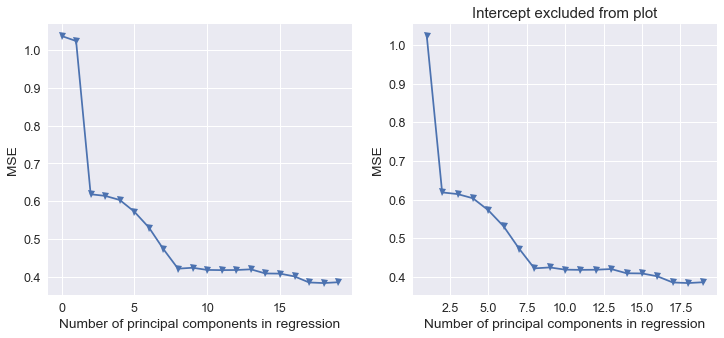

In [87]:
for i in np.arange(1,20):
    score = -1*cross_validation.cross_val_score(lmG2_pcr, trainG2_reduced[:,:i], trainG2.GasCum360.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], mse[1:20], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    #ax.title('OilCum360')

Once we performed a cv on our selected features forlinear regression : we see that a number of 17 pcs gives lowest mse Let's see what regression gives with splitting train and test

In [88]:
pca2 = PCA()
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(trainG2.iloc[:,1:].drop('GasCum360',axis=1), trainG2.GasCum360, test_size=0.3, random_state=0)
# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))

In [89]:
n = len(X_reduced_train)
# 10-fold CV, with shuffle
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
mse = []

In [90]:
# Calculate MSE with only the intercept (no principal components in regression)
lmG2=linear_model.LinearRegression()
score = -1*cross_validation.cross_val_score(lmG2, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
mse.append(score)

Text(0.5,1,'OilCum360')

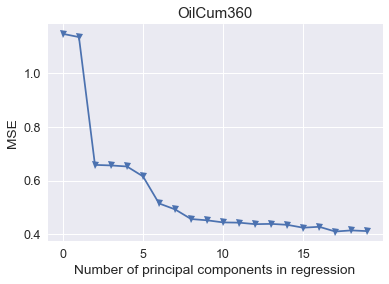

In [91]:
# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_validation.cross_val_score(lmG2, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)
    
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('OilCum360')

In [95]:
X_reduced_test = pca2.transform(scale(X_test))[:,:18]
# Train regression model on training data
regr = linear_model.LinearRegression()
regr.fit(X_reduced_train[:,:18], y_train)
# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

0.35611105211152994